<h2><font color="red">  Customers who come for shopping in a mall can be grouped in a number of ways. Shopping pattern, spending pattern, shopping score, salary etc are some of the factors that can be used to divide the customers into different categories.</font></h2>
<h4><font color="green"> Create Customer cluster to identify the different types of customers </h4>


In [1]:
import pandas as pd
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [2]:
df=pd.read_csv("DS3_C6_S3_MallCustomers_Data_Project.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


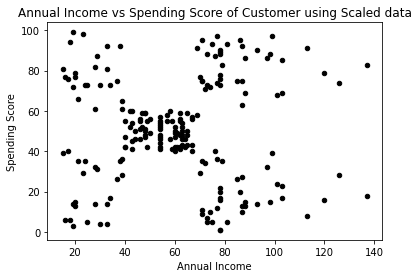

In [3]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],s=20,c='Black')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Annual Income vs Spending Score of Customer using Scaled data")
plt.show()

### <b> Initial Hypothesis : </b>

### Annual Income Vs Spending Score - 

### Mostly five types of customer : 
* ###  Miser : High Income and Low Spending Score

* ### Standard : Average Income and Average Spending Score

* ### Target :  High Income and High Spending Score

* ### Careless : Low Income and High Spending Score

* ### Sensible : Low Income and Low Spending Score


In [4]:
columns=["Annual Income (k$)","Spending Score (1-100)"]
scaled_data = RobustScaler().fit_transform(df[columns])

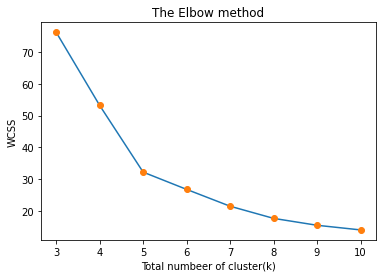

In [5]:
from sklearn.cluster import KMeans
k=[]
wcss= []
for i in range (3,11):
    kmeans= KMeans(n_clusters = i, 
                   init = 'k-means++',
                   max_iter = 30,
                   n_init=10,
                   random_state=2)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    k.append(i)
plt.plot(k,wcss)
plt.plot(k,wcss,"o")
plt.title("The Elbow method")
plt.xlabel("Total numbeer of cluster(k)")
plt.ylabel("WCSS")
plt.show()

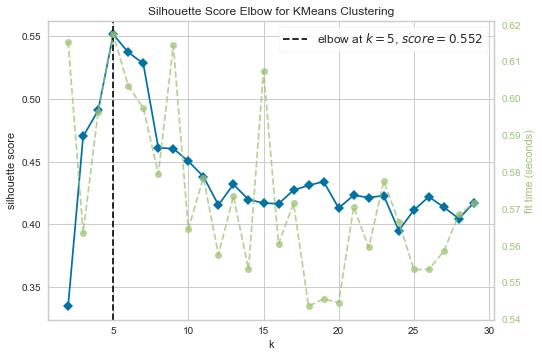

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [6]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric="silhouette", timings= True)
visualizer.fit(scaled_data)        # Fit data to visualizer
visualizer.show() 

###### Number of Clusters = 5

In [7]:
kmeans= KMeans(n_clusters = 5, 
                   init = 'k-means++',
                   max_iter = 300,
                   n_init=100,
                   random_state=2)
labels_kmeans=kmeans.fit_predict(scaled_data)
centers=kmeans.cluster_centers_

In [8]:
LABEL_COLOR_MAP = {0 : 'fuchsia',1 : '#a6e22e',2 : 'green',3 : 'orange',4 : 'purple', -1 : 'red'}

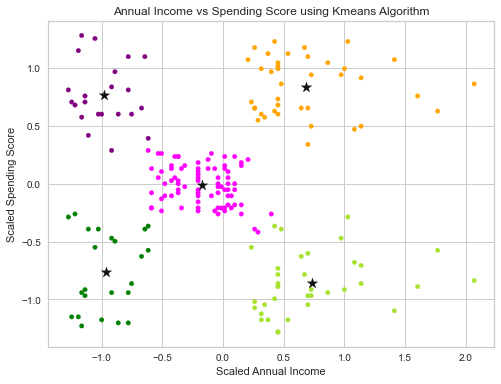

In [9]:
label_color = [LABEL_COLOR_MAP[l] for l in labels_kmeans]
plt.figure(figsize = (8,6))
plt.scatter(scaled_data[:,0],scaled_data[:,1],s=20,c=label_color)
plt.scatter(centers[:,0],centers[:,1],marker="*",s=120,c="k")
plt.xlabel("Scaled Annual Income")
plt.ylabel("Scaled Spending Score")
plt.title("Annual Income vs Spending Score using Kmeans Algorithm")
plt.show()

In [10]:
# fitting DBSCAN to the dataset
from sklearn.cluster import DBSCAN
epsilon =  [.24,.25,.26,.27,.3] 
for i in epsilon:
    size = [4,5,6,7,10]
    for j in size:
        dbscan = DBSCAN(eps = i,
                        min_samples = j)
        labels_dbscan = dbscan.fit_predict(scaled_data)
        print(f"For Epsilon = {i} and min_cluster_size = {j} the clusters are {np.unique(labels_dbscan)}")
        print("Total number of data points assigned to clusters = ", len(dbscan.core_sample_indices_))
        print("Total number of data points assigned to noise = ", len(scaled_data)-len(dbscan.core_sample_indices_))
        
    print("\n")

For Epsilon = 0.24 and min_cluster_size = 4 the clusters are [-1  0  1  2  3  4  5  6]
Total number of data points assigned to clusters =  167
Total number of data points assigned to noise =  33
For Epsilon = 0.24 and min_cluster_size = 5 the clusters are [-1  0  1  2  3  4  5]
Total number of data points assigned to clusters =  151
Total number of data points assigned to noise =  49
For Epsilon = 0.24 and min_cluster_size = 6 the clusters are [-1  0  1  2  3  4  5  6]
Total number of data points assigned to clusters =  137
Total number of data points assigned to noise =  63
For Epsilon = 0.24 and min_cluster_size = 7 the clusters are [-1  0  1  2  3]
Total number of data points assigned to clusters =  118
Total number of data points assigned to noise =  82
For Epsilon = 0.24 and min_cluster_size = 10 the clusters are [-1  0  1  2  3]
Total number of data points assigned to clusters =  92
Total number of data points assigned to noise =  108


For Epsilon = 0.25 and min_cluster_size = 4

###### For Epsilon = 0.25 and min_cluster_size = 4 the clusters are [-1  0  1  2  3  4]
###### Total number of data points assigned to clusters =  173
###### Total number of data points assigned to noise =  27

#### The above combination of hyperparameters gives the best results, hence choosing those for the DBSCAN algorithm

In [11]:
dbscan = DBSCAN(eps = .25, min_samples = 4)
labels_dbscan = dbscan.fit_predict(scaled_data)

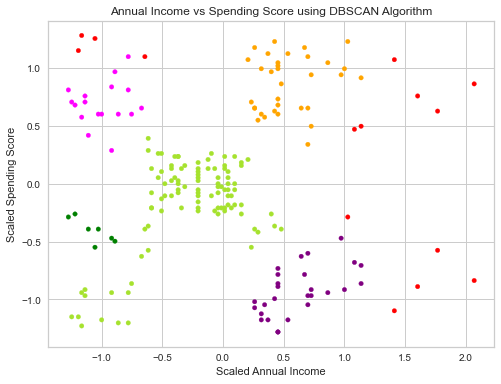

In [12]:
label_color = [LABEL_COLOR_MAP[l] for l in labels_dbscan]
plt.figure(figsize = (8,6))
plt.scatter(scaled_data[:,0],scaled_data[:,1],s=20,c=label_color)
plt.xlabel("Scaled Annual Income")
plt.ylabel("Scaled Spending Score")
plt.title("Annual Income vs Spending Score using DBSCAN Algorithm")
plt.show()

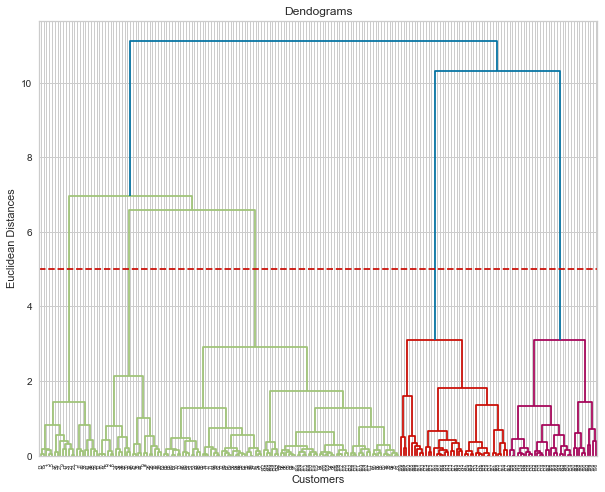

In [13]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 8))
plt.title("Dendograms")
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=5, color='r', linestyle='--')
dendrogram = sch.dendrogram(sch.linkage(scaled_data,method = "ward"))
ax = plt.gca()
ax.tick_params(axis='y', which='major', labelsize=10)

#### As we can se in the **Dendogram** using straight line method we can select number of clusters as 5

In [14]:
# Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

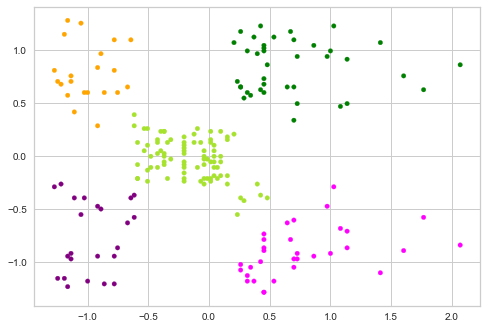

In [15]:
model = AgglomerativeClustering(n_clusters=5, linkage = "ward")
labels_agg = model.fit_predict(scaled_data)
label_color = [LABEL_COLOR_MAP[l] for l in labels_agg]
plt.scatter(scaled_data[:,0],scaled_data[:,1],s=20,c=label_color)
plt.show()

# HDBSCAN

In [16]:
from hdbscan import HDBSCAN

In [17]:
from hdbscan import HDBSCAN
for j in range(3,10):
    clusterer = HDBSCAN(min_cluster_size=j, gen_min_span_tree=True)
    labels = clusterer.fit_predict(scaled_data)
    print(f"For Min_cluster_size = {j} the clusters are {np.unique(labels)}")
    print("Data in Noise",((pd.Series(labels).value_counts()[-1])/len(labels))*100,"%")
#     clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
#     plt.show()

For Min_cluster_size = 3 the clusters are [-1  0  1  2  3  4  5  6  7  8]
Data in Noise 16.0 %
For Min_cluster_size = 4 the clusters are [-1  0  1  2  3  4  5  6]
Data in Noise 17.0 %
For Min_cluster_size = 5 the clusters are [-1  0  1  2  3  4]
Data in Noise 20.0 %
For Min_cluster_size = 6 the clusters are [-1  0  1  2  3  4]
Data in Noise 21.5 %
For Min_cluster_size = 7 the clusters are [-1  0  1  2  3  4]
Data in Noise 25.5 %
For Min_cluster_size = 8 the clusters are [-1  0  1  2  3  4]
Data in Noise 22.5 %
For Min_cluster_size = 9 the clusters are [-1  0  1  2]
Data in Noise 29.5 %


For Min_cluster_size = 5 the clusters are [-1  0  1  2  3  4]
###### For the above hyperparameter selection we get NUMBER OF clusters as 5

In [18]:
clusterer = HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
labels_hdbscan=clusterer.fit_predict(scaled_data)
((pd.Series(labels_hdbscan).value_counts()[-1])/len(labels))*100
# clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
# plt.show()

20.0

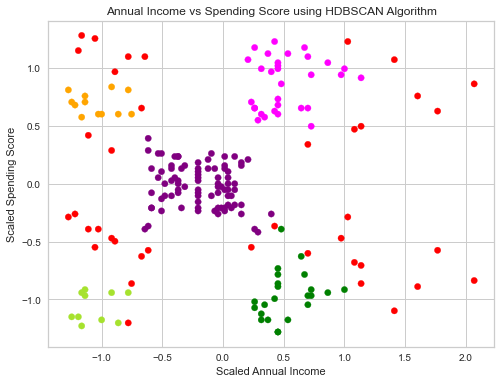

In [19]:
label_color = [LABEL_COLOR_MAP[l] for l in labels_hdbscan]
plt.figure(figsize = (8,6))
plt.scatter(scaled_data[:,0],scaled_data[:,1],s=40,c=label_color)
plt.xlabel("Scaled Annual Income")
plt.ylabel("Scaled Spending Score")
plt.title("Annual Income vs Spending Score using HDBSCAN Algorithm")
plt.show()

No handles with labels found to put in legend.


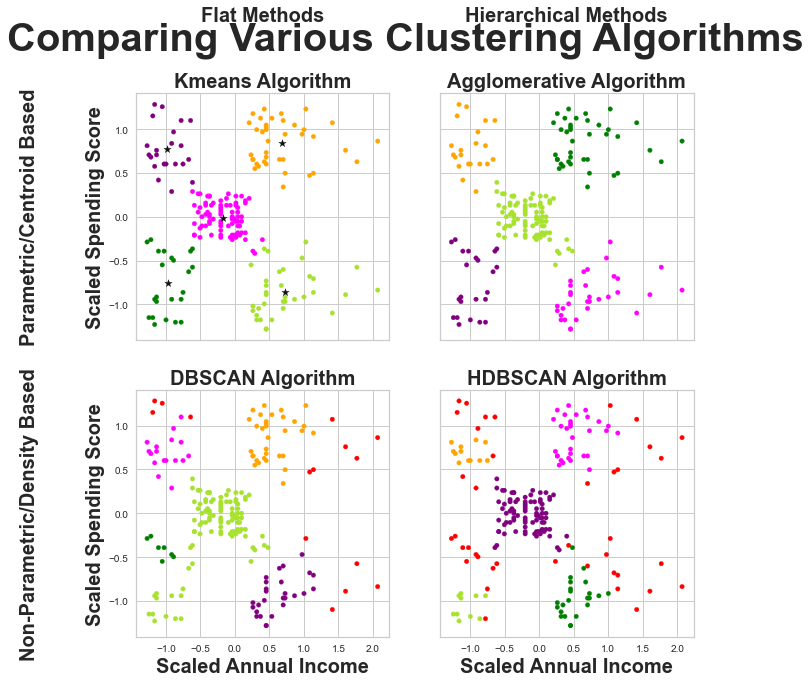

In [20]:
figure, axis = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(10,10))
figure.suptitle("Comparing Various Clustering Algorithms\n\n\n",size=40,weight="bold")

# For KMeans Clustering Algorithm
label_color = [LABEL_COLOR_MAP[l] for l in labels_kmeans]
axis[0, 0].scatter(scaled_data[:,0],scaled_data[:,1],s=20,c=label_color)
axis[0, 0].scatter(centers[:,0],centers[:,1],marker="*",s=60,c="k")
axis[0, 0].set_ylabel("Parametric/Centroid Based\n\n\nScaled Spending Score",size=20,weight="bold")
axis[0, 0].set_title("Flat Methods\n\n\nKmeans Algorithm",size=20,weight="bold")

  
# For Agglomerative Clustering Algorithm
label_color = [LABEL_COLOR_MAP[l] for l in labels_agg]
axis[0, 1].scatter(scaled_data[:,0],scaled_data[:,1],s=20,c=label_color)
axis[0, 1].set_title("Hierarchical Methods\n\n\nAgglomerative Algorithm",size=20,weight="bold")

# For DBSCAN Clustering Algorithm
label_color = [LABEL_COLOR_MAP[l] for l in labels_dbscan]
axis[1, 0].scatter(scaled_data[:,0],scaled_data[:,1],s=20,c=label_color)
axis[1, 0].set_xlabel("Scaled Annual Income",size=20,weight="bold")
axis[1, 0].set_ylabel("Non-Parametric/Density Based\n\n\nScaled Spending Score",size=20,weight="bold")
axis[1, 0].set_title("DBSCAN Algorithm",size=20,weight="bold")
  
# For HDBSCAN Clustering Algorithm
label_color = [LABEL_COLOR_MAP[l] for l in labels_hdbscan]
axis[1, 1].scatter(scaled_data[:,0],scaled_data[:,1],s=20,c=label_color)
axis[1, 1].set_xlabel("Scaled Annual Income",size=20,weight="bold")
axis[1, 1].set_title("HDBSCAN Algorithm",size=20,weight="bold")
plt.legend()
# Combine all the operations and display
plt.show()

## In the above comparison we can observe that Agglomerative Clustering Algorithm gives us the best clustering for our data

In [21]:
df["labels"] = labels_agg

In [22]:
# create a list of our conditions
conditions = [
    (df["labels"]==0),
    (df["labels"]==1),
    (df["labels"]==2),
    (df["labels"]==3),
    (df["labels"]==4)
    ]

# create a list of the values we want to assign for each condition
values = ["Miser","Standard","Target","Careless","Sensible"]

# create a new column and use np.select to assign values to it using our lists as arguments
df['Consumer_Type'] = np.select(conditions, values)

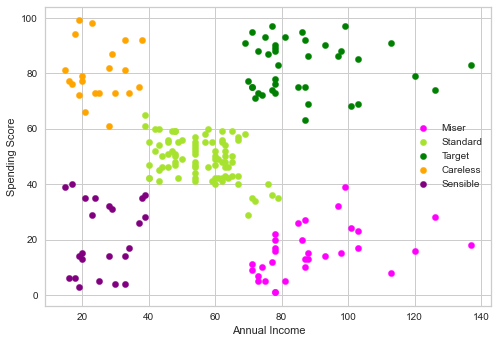

In [23]:
plt.figsize=(10,10)
arr0 = plt.scatter(df[df["labels"]==0]["Annual Income (k$)"],df[df["labels"]==0]["Spending Score (1-100)"],s=40,c='fuchsia')
arr1 = plt.scatter(df[df["labels"]==1]["Annual Income (k$)"],df[df["labels"]==1]["Spending Score (1-100)"],s=40,c='#a6e22e')
arr2 = plt.scatter(df[df["labels"]==2]["Annual Income (k$)"],df[df["labels"]==2]["Spending Score (1-100)"],s=40,c='green')
arr3 = plt.scatter(df[df["labels"]==3]["Annual Income (k$)"],df[df["labels"]==3]["Spending Score (1-100)"],s=40,c="orange")
arr4 = plt.scatter(df[df["labels"]==4]["Annual Income (k$)"],df[df["labels"]==4]["Spending Score (1-100)"],s=40,c="purple")
plt.legend([arr0,arr1, arr2, arr3,arr4], ["Miser","Standard","Target","Careless","Sensible"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

#### Semantic Labeling

In [24]:
for cluster in df.Consumer_Type.unique():
    print(f"The cluster of {cluster} spenders have mean age {round(df[df['Consumer_Type'] == cluster]['Age'].mean())} \
         \nThe uniuqe values in the clusters :\t{df[df['Consumer_Type'] == cluster]['Age'].unique()} \n\n")

The cluster of Sensible spenders have mean age 45          
The uniuqe values in the clusters :	[19 20 31 35 64 67 58 37 52 46 54 45 40 60 53 49 42 36 65 48] 


The cluster of Careless spenders have mean age 25          
The uniuqe values in the clusters :	[21 23 22 30 35 24 20 25 31 29 18] 


The cluster of Standard spenders have mean age 42          
The uniuqe values in the clusters :	[31 24 50 27 29 49 33 59 47 51 69 53 70 19 67 54 63 18 43 68 32 60 26 45
 40 23 57 38 46 21 48 55 22 34 20 66 65 25 28 56] 


The cluster of Target spenders have mean age 33          
The uniuqe values in the clusters :	[39 31 40 38 29 32 35 28 34 27 30 36 33] 


The cluster of Miser spenders have mean age 41          
The uniuqe values in the clusters :	[59 47 20 44 19 57 25 34 43 37 50 42 36 40 52 58 46 41 54 33 45 32] 




###### The cluster of Sensible spenders have mean age 45  

###### The cluster of Careless spenders have mean age 25          

###### The cluster of Standard spenders have mean age 42          

###### The cluster of Target spenders have mean age 33          

###### The cluster of Miser spenders have mean age 41          
